# Naive Bayes

`scikit-learn` provides multiple implementations of Naive Bayes that differ on how conditional probabilities are calculated. So the different implementations are suitable for different types of data. 

- `CategorialNB` will work with categorical data once it is processed using an `OrdinalEncoder`
- `GaussianNB` assumes the numerical features have a Gaussian distribution
- `BernoulliNB` binary data
- `MultinomialNB` count data, e.g. word counts

In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, CategoricalNB
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import OneHotEncoder

In [3]:
swim = pd.read_csv('../data/Swimming.csv')
swim

,Rain_Recently,Rain_Today,Temp,Wind,Sunshine,Swimming
0,Moderate,Moderate,Warm,Light,Some,Yes
1,Light,Moderate,Warm,Moderate,None,No
2,Moderate,Moderate,Cold,Gale,None,No
3,Moderate,Moderate,Warm,Light,None,Yes
4,Moderate,Light,Cold,Light,Some,No
5,Heavy,Light,Cold,Moderate,Some,Yes
6,Light,Light,Cold,Moderate,Some,No
7,Moderate,Moderate,Cold,Gale,Some,No
8,Heavy,Heavy,Warm,Moderate,None,Yes
9,Light,Light,Cold,Light,Some,No


## Categorical NB

In [4]:
from sklearn.preprocessing import OrdinalEncoder

In [5]:
y = swim.pop('Swimming').values # Set this as the y (target)
print(swim.columns)
print(y)

Index(['Rain_Recently', 'Rain_Today', 'Temp', 'Wind', 'Sunshine'], dtype='object')
['Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No']


In [6]:
ord_encoder = OrdinalEncoder()
swimOE = ord_encoder.fit_transform(swim)
swimOE

array([[2., 2., 1., 1., 1.],
       [1., 2., 1., 2., 0.],
       [2., 2., 0., 0., 0.],
       [2., 2., 1., 1., 0.],
       [2., 1., 0., 1., 1.],
       [0., 1., 0., 2., 1.],
       [1., 1., 0., 2., 1.],
       [2., 2., 0., 0., 1.],
       [0., 0., 1., 2., 0.],
       [1., 1., 0., 1., 1.]])

What ordering do you get for the ordinal features?   
Look up the documentation to see how you would fix this if you want to use the OrdinalEncoder

In [7]:
catNB = CategoricalNB(fit_prior=True, alpha=.0001)
swim_catNB = catNB.fit(swimOE,y)
y_dash = swim_catNB.predict(swimOE)  #predict training data
confusion = confusion_matrix(y, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 

Confusion matrix:
[[6 0]
 [0 4]]


In [26]:
# Three query examples, two from the lecture and one from the training data.

squery = pd.DataFrame([["Moderate","Moderate","Warm","Light","Some"],
                       ["Moderate","Moderate","Cold","Moderate","Some"],
                       ["Moderate","Light","Warm","Light","None"]
                      ], columns=swim.columns)

squery

,Rain_Recently,Rain_Today,Temp,Wind,Sunshine
0,Moderate,Moderate,Warm,Light,Some
1,Moderate,Moderate,Cold,Moderate,Some
2,Moderate,Light,Warm,Light,None


In [9]:
X_query = ord_encoder.transform(squery)
X_query, X_query.shape

(array([[2., 2., 1., 1., 1.],
        [2., 2., 0., 2., 1.],
        [2., 1., 1., 1., 0.]]),
 (3, 5))

In [10]:
y_query = swim_catNB.predict(X_query)
y_query

array(['Yes', 'No', 'Yes'], dtype='<U3')

In [11]:
q_probs = swim_catNB.predict_proba(X_query)
q_probs

array([[0.228592  , 0.771408  ],
       [0.81632203, 0.18367797],
       [0.22858759, 0.77141241]])

In [12]:
swim_catNB.get_params()

{'alpha': 0.0001, 'class_prior': None, 'fit_prior': True}

### One-Hot-Encode the training data
Here we use one-hot encoding to convert to the Swimming dataset to a numeric format.   
This converts the data to a binary format so it is valid to use `BernoulliNB` and possibly `MultinormialNB` - `GaussianNB` not so much. 

In [13]:
swim = pd.read_csv('../data/Swimming.csv')
y = swim.pop('Swimming').values # Set this as the y (target)


onehot_encoder = OneHotEncoder(sparse=False)
swimOH = onehot_encoder.fit_transform(swim)
swimOH

array([[0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.]])

In [14]:
onehot_encoder.get_feature_names(swim.columns)

array(['Rain_Recently_Heavy', 'Rain_Recently_Light',
       'Rain_Recently_Moderate', 'Rain_Today_Heavy', 'Rain_Today_Light',
       'Rain_Today_Moderate', 'Temp_Cold', 'Temp_Warm', 'Wind_Gale',
       'Wind_Light', 'Wind_Moderate', 'Sunshine_None', 'Sunshine_Some'],
      dtype=object)

In [15]:
gnb = GaussianNB()
swim_numNB = gnb.fit(swimOH,y)
y_dash = swim_numNB.predict(swimOH)
confusion = confusion_matrix(y, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 

Confusion matrix:
[[6 0]
 [0 4]]


In [16]:
mnb = MultinomialNB()
swim_numNB = mnb.fit(swimOH,y)
y_dash = swim_numNB.predict(swimOH)
confusion = confusion_matrix(y, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 

Confusion matrix:
[[6 0]
 [1 3]]


In [17]:
bnb = BernoulliNB()
swim_numNB = bnb.fit(swimOH,y)
y_dash = swim_numNB.predict(swimOH)
confusion = confusion_matrix(y, y_dash)
print("Confusion matrix:\n{}".format(confusion)) 

Confusion matrix:
[[5 1]
 [1 3]]


In [18]:
swim_numNB.classes_

array(['No', 'Yes'], dtype='<U3')

In [19]:
# Three query examples, two from the lecture and one from the training data.

squery = pd.DataFrame([["Moderate","Moderate","Warm","Light","Some"],
                       ["Moderate","Moderate","Cold","Moderate","Some"],
                       ["Moderate","Light","Warm","Light","None"]
                      ], columns=swim.columns)

In [20]:
X_query = onehot_encoder.transform(squery)
X_query, X_query.shape

(array([[0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
        [0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.],
        [0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.]]),
 (3, 13))

In [21]:
y_query = swim_numNB.predict(X_query)
y_query

array(['Yes', 'No', 'Yes'], dtype='<U3')

In [22]:
q_probs = swim_numNB.predict_proba(X_query)
q_probs

array([[0.19324128, 0.80675872],
       [0.89608238, 0.10391762],
       [0.14709254, 0.85290746]])

## Gaussian Approximations
Gaussian Naive Bayes approximates numerical features using a Normal distribution.  
Here we look at the distributions of the Iris features to see if this looks reasonable. 

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

Text(0, 0.5, 'Probability')

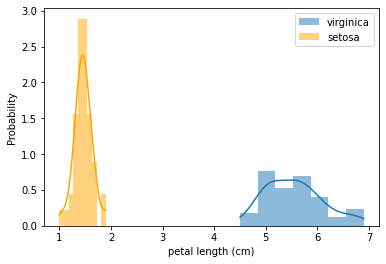

In [25]:
findex = 2 # any value in [0,1,2,3] - the feature index
c1 = 2     # any value in [0,1,2]  - the classes
c2 = 0

sns.histplot(iris.data[iris.target == c1][:,findex], label=iris.target_names[c1],
            kde=True, stat="density", linewidth=0)
sns.histplot(iris.data[iris.target == c2][:,findex], label=iris.target_names[c2],
             color = 'orange', kde=True, stat="density", linewidth=0)
 
plt.legend();
plt.xlabel(iris.feature_names[findex])
plt.ylabel('Probability')